3.) Perder hasta la camisa
==
Miquel Gotanegra

<strong>
Las finanzas son un área de aplicación del aprendizaje automático y las redes neuronales. Esta
no es sencilla dados los múltiples factores que intervienen y lo difícil que es representarlos y
estimarlos adecuadamente. A veces lo que nos puede parecer una aplicación obvia y directa de
métodos a los datos no lo es tanto y eso nos puede hacer perder hasta la camisa.
En este problema trabajaremos con datos reales del NASDAQ sobre la cotización de las acciones
de cinco empresas tecnológicas (Google, Microsoft, Apple, Intel y AMD) durante cinco años.
Podéis obtener los datos mediante la función load_NASDAQ de la librería apafib. Esta os retornará un dataframe que tiene tres columnas para cada acción, el valor final de la acción al final
del día (P), el volumen de acciones que se intercambiaron (V) y la diferencia entre el mayor y
el menor precio al que cotizaron en el día (GAP). Resuelve los siguientes apartados ilustrando
los resultados de la manera que te parezca más adecuada.
</strong>

In [1]:
# Uncomment to upgrade packages
# !pip install pandas --user --upgrade --quiet
# !pip install numpy==1.23.5 --user --upgrade --quiet
# !pip install scipy --user --upgrade --quiet
# !pip install seaborn --user --upgrade --quiet
# !pip install matplotlib --user --upgrade --quiet
# !pip install scikit-learn --user --upgrade 
# !pip install scikit-optimize --user --quiet
# !pip install eli5 --user --quiet
# !pip install apafib --upgrade --user --quiet
# !pip install wordcloud --upgrade --user --quiet

  DEPRECATION: wordcloud is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  error: subprocess-exited-with-error
  
  × Running setup.py install for wordcloud did not run successfully.
  │ exit code: 1
  ╰─> [22 lines of output]
      running install
      C:\Users\mgota\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\wordcloud
      copying wordcloud\color_from_image.py -> build\lib.w

In [18]:
from apafib import load_NASDAQ
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix

import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn import set_config

from sklearn.metrics import  ConfusionMatrixDisplay,\
                    classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score

from sklearn.manifold import TSNE
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from yellowbrick.classifier.rocauc import roc_auc

from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import warnings

set_config(display='text')
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 16})
# sns.set()
pd.set_option('display.precision', 3)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

from collections import Counter

def save_results(clf, X_test, y_test, nclf, df):
    df.loc[nclf,'test acc'] = accuracy_score(y_test, clf.predict(X_test))
    df.loc[nclf,'precision score (W)'] = precision_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'recall score (W)'] = recall_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'f1 score (W)'] = f1_score(y_test, clf.predict(X_test), average='weighted')
    return df

results_df = pd.DataFrame()

niter = 15
cv = 5

<strong>
a) Haz un estudio de las características de los datos calculando sus estadísticas, la correlación
entre los datos y representándolos de la manera que te parezca interesante. ¿Crees que
puede ser posible predecir unas variables a partir de otras?
 


In [19]:
nasdaq = load_NASDAQ();
print(nasdaq.shape)
##vemos que tenemos 1259 dias para analizar
nasdaq.head()

(1259, 15)


,GOOGLE-P,GOOGLE-V,GOOGLE-GAP,MSFT-P,MSFT-V,MSFT-GAP,AAPL-P,AAPL-V,AAPL-GAP,INTEL-P,INTEL-V,INTEL-GAP,AMD-P,AMD-V,AMD-GAP
0,45.333,18846560,0.480,72.15,17698800,0.78,39.303,105320280,0.695,34.92,26479700,0.58,12.05,58786300,0.560
1,46.234,23326400,0.719,73.16,14333220,0.89,39.945,86259560,0.495,34.65,26093400,0.57,12.17,38946780,0.230
2,46.350,21771500,0.528,72.72,13758650,0.62,39.995,77507760,0.398,34.66,19775620,0.43,12.48,44193270,0.585
3,46.064,25323820,0.767,72.69,17097240,0.79,39.818,79128680,0.547,34.71,14283180,0.34,12.50,37161680,0.320
4,45.794,21055280,0.503,72.82,12790300,0.87,39.965,100738400,0.322,34.67,14714810,0.35,12.43,29650370,0.320


In [20]:
##no hay valores perdidos
print(nasdaq.isna().sum());
nasdaq.describe().T


GOOGLE-P      0
GOOGLE-V      0
GOOGLE-GAP    0
MSFT-P        0
MSFT-V        0
MSFT-GAP      0
AAPL-P        0
AAPL-V        0
AAPL-GAP      0
INTEL-P       0
INTEL-V       0
INTEL-GAP     0
AMD-P         0
AMD-V         0
AMD-GAP       0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
GOOGLE-P,1259.0,8.235e+01,3.232e+01,4.533e+01,5.610e+01,6.736e+01,1.129e+02,1.507e+02
GOOGLE-V,1259.0,3.092e+07,1.348e+07,6.935e+06,2.257e+07,2.773e+07,3.531e+07,1.239e+08
GOOGLE-GAP,1259.0,1.740e+00,1.210e+00,2.380e-01,8.713e-01,1.371e+00,2.219e+00,9.215e+00
MSFT-P,1259.0,1.818e+02,7.862e+01,7.215e+01,1.082e+02,1.635e+02,2.525e+02,3.431e+02
MSFT-V,1259.0,2.954e+07,1.299e+07,7.426e+06,2.125e+07,2.629e+07,3.374e+07,1.109e+08
MSFT-GAP,1259.0,3.813e+00,2.913e+00,3.400e-01,1.660e+00,3.060e+00,5.141e+00,2.364e+01
AAPL-P,1259.0,9.035e+01,4.627e+01,3.555e+01,4.748e+01,7.193e+01,1.336e+02,1.820e+02
AAPL-V,1259.0,1.185e+08,5.504e+07,4.100e+07,8.194e+07,1.043e+08,1.383e+08,4.269e+08
AAPL-GAP,1259.0,2.068e+00,1.694e+00,2.135e-01,7.762e-01,1.502e+00,2.925e+00,1.281e+01
INTEL-P,1259.0,5.089e+01,6.684e+00,3.452e+01,4.672e+01,5.059e+01,5.538e+01,6.847e+01


In [21]:

google = nasdaq.loc[:, 'GOOGLE-P':'GOOGLE-GAP'];
msft = nasdaq.loc[:, 'MSFT-P':'MSFT-GAP'];
appl = nasdaq.loc[:, 'AAPL-P':'AAPL-GAP'];
intel = nasdaq.loc[:, 'INTEL-P':'INTEL-GAP'];
amd = nasdaq.loc[:, 'AMD-P':'AMD-GAP'];

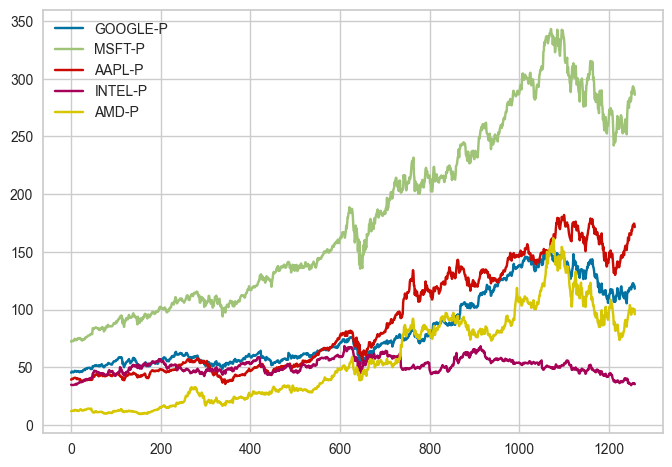

In [22]:
plt.plot(nasdaq[['GOOGLE-P','MSFT-P','AAPL-P','INTEL-P', 'AMD-P']],label=['GOOGLE-P','MSFT-P','AAPL-P','INTEL-P', 'AMD-P']);
plt.legend();

Podemos ver que todas menos intel van creciendo hasta llegar al dia ~1100, donde deja de crecer o cae. Por otro lado, parece que el precio de las acciones de intel se mantiene en un precio estable durante todo el periodo.


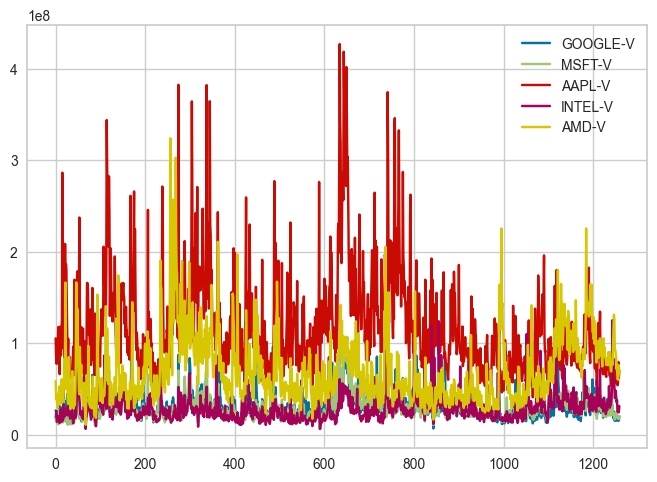

In [23]:
plt.plot(nasdaq[['GOOGLE-V','MSFT-V','AAPL-V','INTEL-V', 'AMD-V']],label=['GOOGLE-V','MSFT-V','AAPL-V','INTEL-V', 'AMD-V']);
plt.legend();

Tambien vemos que el volumen de transacciones es muchíssimo mas elevado para amd y sobretodo para apple, en comparación a las demás.

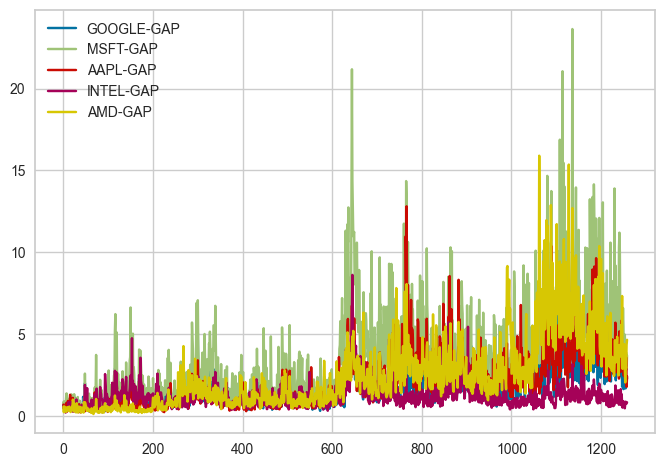

In [24]:
plt.plot(nasdaq[['GOOGLE-GAP','MSFT-GAP','AAPL-GAP','INTEL-GAP', 'AMD-GAP']],label=['GOOGLE-GAP','MSFT-GAP','AAPL-GAP','INTEL-GAP', 'AMD-GAP']);
plt.legend();

En el gap podemos ver los mismos picos que en el precio de las acciones, y como microsoft y amd han tenido un crecimiento en su precio más pronunciado que las demás, són las que más se marcan en este grafo

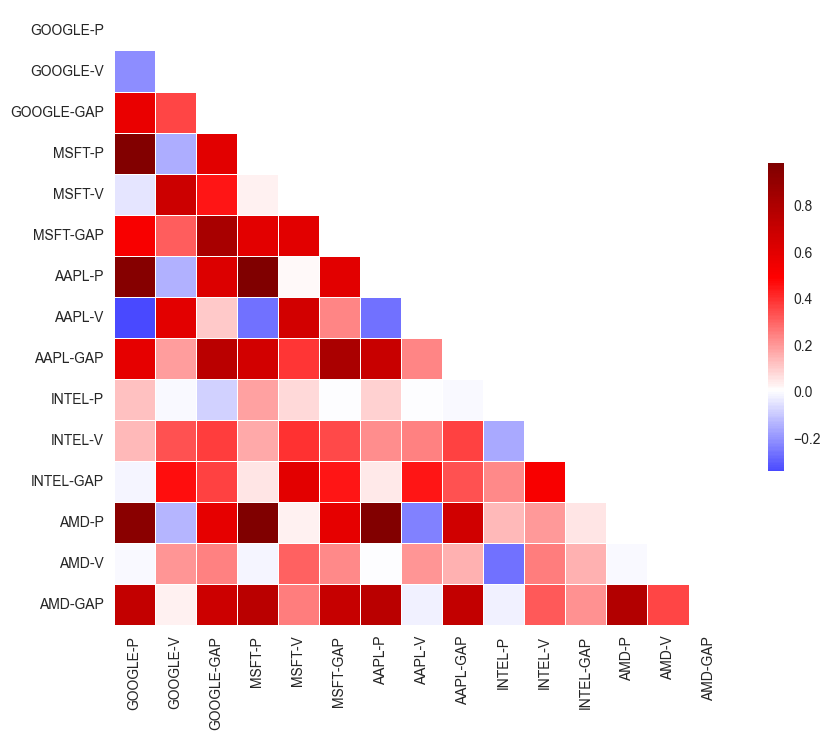

In [25]:
corr = nasdaq.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

Menos en el caso de intel, que ha mantenido un precio constante, parece haber una correlación positiva fuerte entre los precios de las acciones, és decir que si normalmente suben el precio a la vez. Esto tiene sentido, ya que todas són empresas tecnologicas y les afectan de las mismas condiciones en el mercado, como por ejemplo el tema de la pandemia afectó positivamente a estas empresas.

También por lo general parece haber una correlación positiva entre el precio y el gap de la misma empresa, y negativa entre el precio y el volumen de transacciones (Seguramente ya que cuando las acciones suben menos gente esta dispuesta a deshacerse de ellas).

Debido a estas fuertes relaciones seria possible dar una predicción razonable, aunque seria más complicadao para el caso de intel ya que no guarda tanta relación con las demás como las otras.

<strong>
Divide los datos en conjunto de entrenamiento (los 1000 primeros días) y test (el resto) y normalízalos a la escala [0-1]. Para generar los datos, tendrás que obtener ventanas de una cierta longitud w. La función de numpy sliding_window_view permite obtener una vista de una matriz que corresponde a lo que necesitas. Si obtienes una ventana de longitud w+1 esa última columna contendrá el valor a predecir con los w elementos de la ventana. Tendrás que generar conjuntos de datos usando todas las variables para una longitud de ventana de 3. Fíjate en que trabajas con matrices con 3 dimensiones, adapta los datos para poder aplicar un MLP que trabaja con matrices de 2 dimensiones (usa la función reshape). 

In [26]:
from numpy.lib.stride_tricks import sliding_window_view
nasdaq[:1000]

,GOOGLE-P,GOOGLE-V,GOOGLE-GAP,MSFT-P,MSFT-V,MSFT-GAP,AAPL-P,AAPL-V,AAPL-GAP,INTEL-P,INTEL-V,INTEL-GAP,AMD-P,AMD-V,AMD-GAP
0,45.333,18846560,0.480,72.15,17698800,0.780,39.303,105320280,0.695,34.92,26479700,0.580,12.05,58786300,0.560
1,46.234,23326400,0.719,73.16,14333220,0.890,39.945,86259560,0.495,34.65,26093400,0.570,12.17,38946780,0.230
2,46.350,21771500,0.528,72.72,13758650,0.620,39.995,77507760,0.398,34.66,19775620,0.430,12.48,44193270,0.585
3,46.064,25323820,0.767,72.69,17097240,0.790,39.818,79128680,0.547,34.71,14283180,0.340,12.50,37161680,0.320
4,45.794,21055280,0.503,72.82,12790300,0.870,39.965,100738400,0.322,34.67,14714810,0.350,12.43,29650370,0.320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,136.029,16527140,1.123,286.51,16191300,2.938,146.950,56368270,1.510,53.90,17612710,0.740,118.77,225368700,8.330
996,136.940,11871780,1.350,289.52,13900170,3.530,147.060,46397670,1.670,53.89,15310010,0.440,112.35,137860900,6.090
997,137.036,13565020,1.034,289.46,16589340,1.876,146.140,54126810,1.480,53.92,19256020,0.400,110.11,143899000,6.560
998,138.002,12379560,1.893,288.33,16117630,3.740,146.090,48908690,1.180,54.05,14670140,0.580,107.58,115749900,5.270


In [27]:
nasdaq_training = nasdaq[:1000].to_numpy();
nasdaq_testing = nasdaq[1000:].to_numpy();

#vemos que cada que cada posición corresponde a los datos de un dia
#nasdaq_training[0:6]

In [28]:
w = 3
niter = 15
cv = 5
nasdaqScaler = MinMaxScaler();

norm_train = nasdaqScaler.fit_transform(nasdaq_training);
norm_test = nasdaqScaler.transform(nasdaq_testing);

##mismos datos, normalizados
norm_train[0:6]


array([[0.        , 0.10184359, 0.04724717, 0.        , 0.09923934,
        0.02111324, 0.03305385, 0.1569647 , 0.0382249 , 0.00798344,
        0.11461069, 0.04399524, 0.02306847, 0.15265091, 0.04867257],
       [0.00955875, 0.14014632, 0.09394768, 0.00464325, 0.06672776,
        0.02639155, 0.03870954, 0.10699382, 0.02234748, 0.        ,
        0.11241526, 0.04280618, 0.02416697, 0.08922711, 0.01216814],
       [0.01078341, 0.12685189, 0.05671613, 0.00262045, 0.06117739,
        0.0134357 , 0.03914967, 0.08404951, 0.01460723, 0.00029568,
        0.07650996, 0.02615933, 0.02700476, 0.10599931, 0.05143805],
       [0.00775091, 0.15722431, 0.10327997, 0.00248253, 0.09342826,
        0.02159309, 0.0375872 , 0.08829903, 0.0265153 , 0.0017741 ,
        0.04529523, 0.01545779, 0.02718784, 0.08352043, 0.02212389],
       [0.00489336, 0.1207282 , 0.05167903, 0.00308018, 0.05182311,
        0.02543186, 0.03888559, 0.14495253, 0.0086532 , 0.00059137,
        0.04774828, 0.01664685, 0.02654705, 

In [29]:
##vemos que cada ventana contiene w + 1 dias, intentaremos predecir el 4rto dia a partir de los 3 anteriores
windows_train = sliding_window_view(norm_train, [w+1,nasdaq_training.shape[1]]).copy().squeeze()
print(windows_train[0])
print('------------------------------------------------------')
print(windows_train[1])

[[0.         0.10184359 0.04724717 0.         0.09923934 0.02111324
  0.03305385 0.1569647  0.0382249  0.00798344 0.11461069 0.04399524
  0.02306847 0.15265091 0.04867257]
 [0.00955875 0.14014632 0.09394768 0.00464325 0.06672776 0.02639155
  0.03870954 0.10699382 0.02234748 0.         0.11241526 0.04280618
  0.02416697 0.08922711 0.01216814]
 [0.01078341 0.12685189 0.05671613 0.00262045 0.06117739 0.0134357
  0.03914967 0.08404951 0.01460723 0.00029568 0.07650996 0.02615933
  0.02700476 0.10599931 0.05143805]
 [0.00775091 0.15722431 0.10327997 0.00248253 0.09342826 0.02159309
  0.0375872  0.08829903 0.0265153  0.0017741  0.04529523 0.01545779
  0.02718784 0.08352043 0.02212389]]
------------------------------------------------------
[[0.00955875 0.14014632 0.09394768 0.00464325 0.06672776 0.02639155
  0.03870954 0.10699382 0.02234748 0.         0.11241526 0.04280618
  0.02416697 0.08922711 0.01216814]
 [0.01078341 0.12685189 0.05671613 0.00262045 0.06117739 0.0134357
  0.03914967 0.084

In [30]:
X_train, y_train = windows_train[:,:-1], windows_train.squeeze()[:,-1]
print(X_train[0])
print('------------------------------------------------------')
print(y_train[0])

[[0.         0.10184359 0.04724717 0.         0.09923934 0.02111324
  0.03305385 0.1569647  0.0382249  0.00798344 0.11461069 0.04399524
  0.02306847 0.15265091 0.04867257]
 [0.00955875 0.14014632 0.09394768 0.00464325 0.06672776 0.02639155
  0.03870954 0.10699382 0.02234748 0.         0.11241526 0.04280618
  0.02416697 0.08922711 0.01216814]
 [0.01078341 0.12685189 0.05671613 0.00262045 0.06117739 0.0134357
  0.03914967 0.08404951 0.01460723 0.00029568 0.07650996 0.02615933
  0.02700476 0.10599931 0.05143805]]
------------------------------------------------------
[0.00775091 0.15722431 0.10327997 0.00248253 0.09342826 0.02159309
 0.0375872  0.08829903 0.0265153  0.0017741  0.04529523 0.01545779
 0.02718784 0.08352043 0.02212389]


In [31]:
## "Aplanamos" X_train
t = []
for sublist in X_train:
    t.append(sublist.flatten())
X_train = t
print(X_train[0])

[0.         0.10184359 0.04724717 0.         0.09923934 0.02111324
 0.03305385 0.1569647  0.0382249  0.00798344 0.11461069 0.04399524
 0.02306847 0.15265091 0.04867257 0.00955875 0.14014632 0.09394768
 0.00464325 0.06672776 0.02639155 0.03870954 0.10699382 0.02234748
 0.         0.11241526 0.04280618 0.02416697 0.08922711 0.01216814
 0.01078341 0.12685189 0.05671613 0.00262045 0.06117739 0.0134357
 0.03914967 0.08404951 0.01460723 0.00029568 0.07650996 0.02615933
 0.02700476 0.10599931 0.05143805]


In [32]:
#mismo proceso para el test
windows_test = sliding_window_view(norm_test, [w+1,nasdaq_testing.shape[1]]).copy().squeeze()
X_test, y_test = windows_test[:,:-1], windows_test.squeeze()[:,-1]
t = []
for sublist in X_test:
    t.append(sublist.flatten())
X_test = t

In [33]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from skopt import BayesSearchCV
param = {'hidden_layer_sizes':[100, 200, 300], 
         'activation':['relu',  'logistic'], 
         'alpha':[0.0001, 0.001, 0.01],
         'momentum': [0.95, 0.90, 0.85], 
         'learning_rate_init': [0.001, 0.01, 0.1],
         'n_iter_no_change':[30, 40, 50], 
         'learning_rate': ['constant', 'invscaling', 'adaptive']}

mlp =  MLPRegressor(max_iter=10000,early_stopping=True,random_state=0)
mlp_bs = BayesSearchCV(mlp,param,n_iter=niter, 
                        cv=TimeSeriesSplit(n_splits=cv, gap=w+1), 
                        scoring=make_scorer(mean_squared_error, greater_is_better=False),
                        n_jobs=-1, 
                        refit=True, random_state=0)    
mlp_bs.fit(X_train, y_train);

AttributeError: module 'numpy' has no attribute 'int'

In [ ]:
show_html(pd.DataFrame(mlp_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
14,"{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 300, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'momentum': 0.9, 'n_iter_no_change': 40}",-0.008,1
9,"{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 200, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'momentum': 0.9, 'n_iter_no_change': 40}",-0.008,2
1,"{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': 300, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'momentum': 0.85, 'n_iter_no_change': 50}",-0.008,3
8,"{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': 300, 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'momentum': 0.9, 'n_iter_no_change': 40}",-0.009,4
7,"{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 200, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'momentum': 0.85, 'n_iter_no_change': 30}",-0.009,5


In [ ]:
mean_squared_error(y_test,mlp_bs.predict(X_test)), mean_absolute_error(y_test,mlp_bs.predict(X_test))

(0.01485304993489283, 0.07532658757817227)

El error de la validación cruzada parece ser bastante más grande que el del set de training.

In [ ]:
pred = mlp_bs.predict(X_test);
print(y_test[1])
print(pred[1])

[0.97514619 0.12259843 0.33053495 1.01567672 0.12219591 0.09644914
 1.00915473 0.12264565 0.18866352 0.53341218 0.08923627 0.0889893
 0.89738191 0.20145904 0.35730088]
[0.95433608 0.12642368 0.33794848 1.01560967 0.13655087 0.18065727
 1.05501414 0.13218751 0.26082229 0.55382169 0.0989838  0.06230122
 0.89332514 0.22615554 0.47158115]


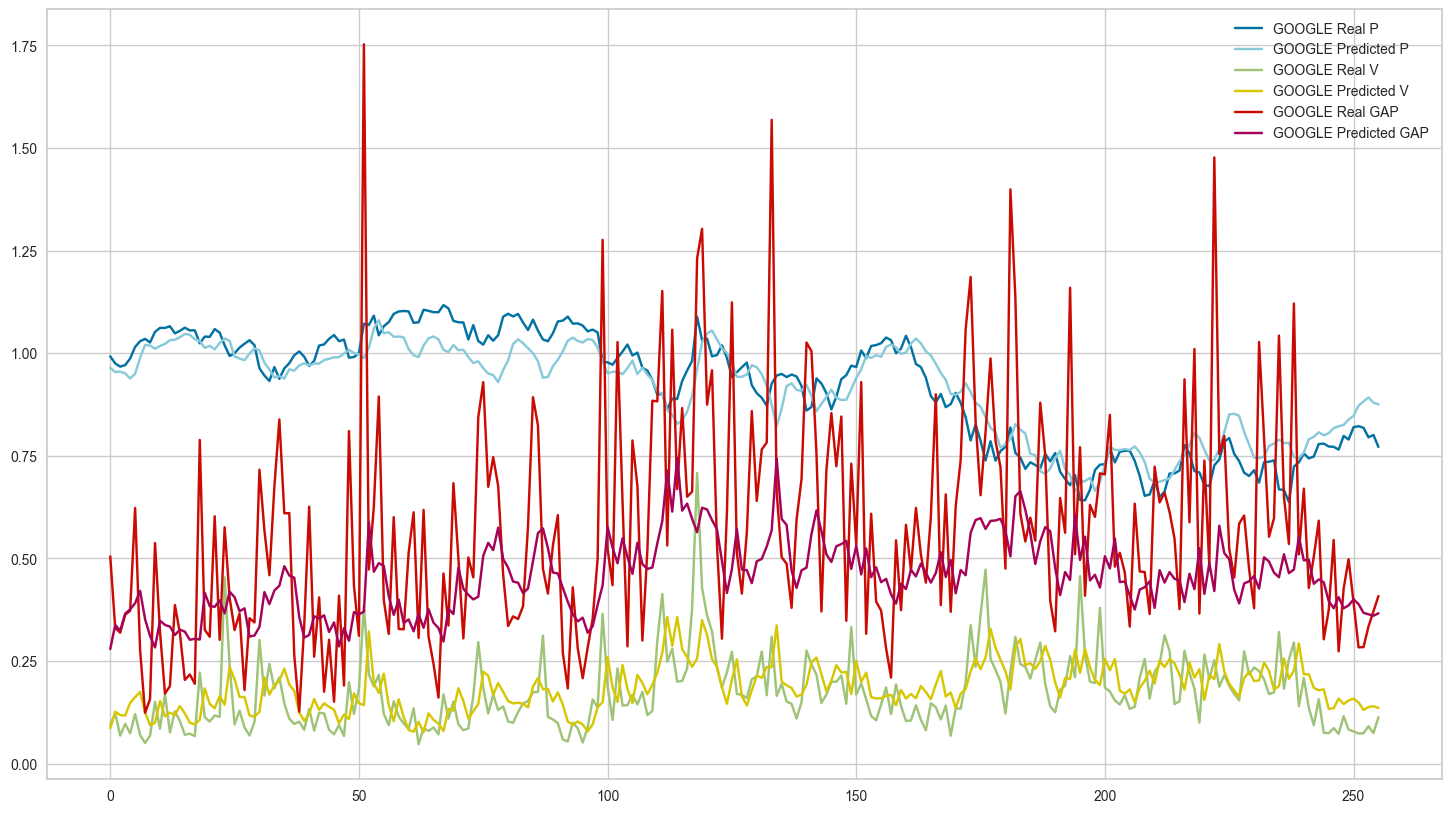

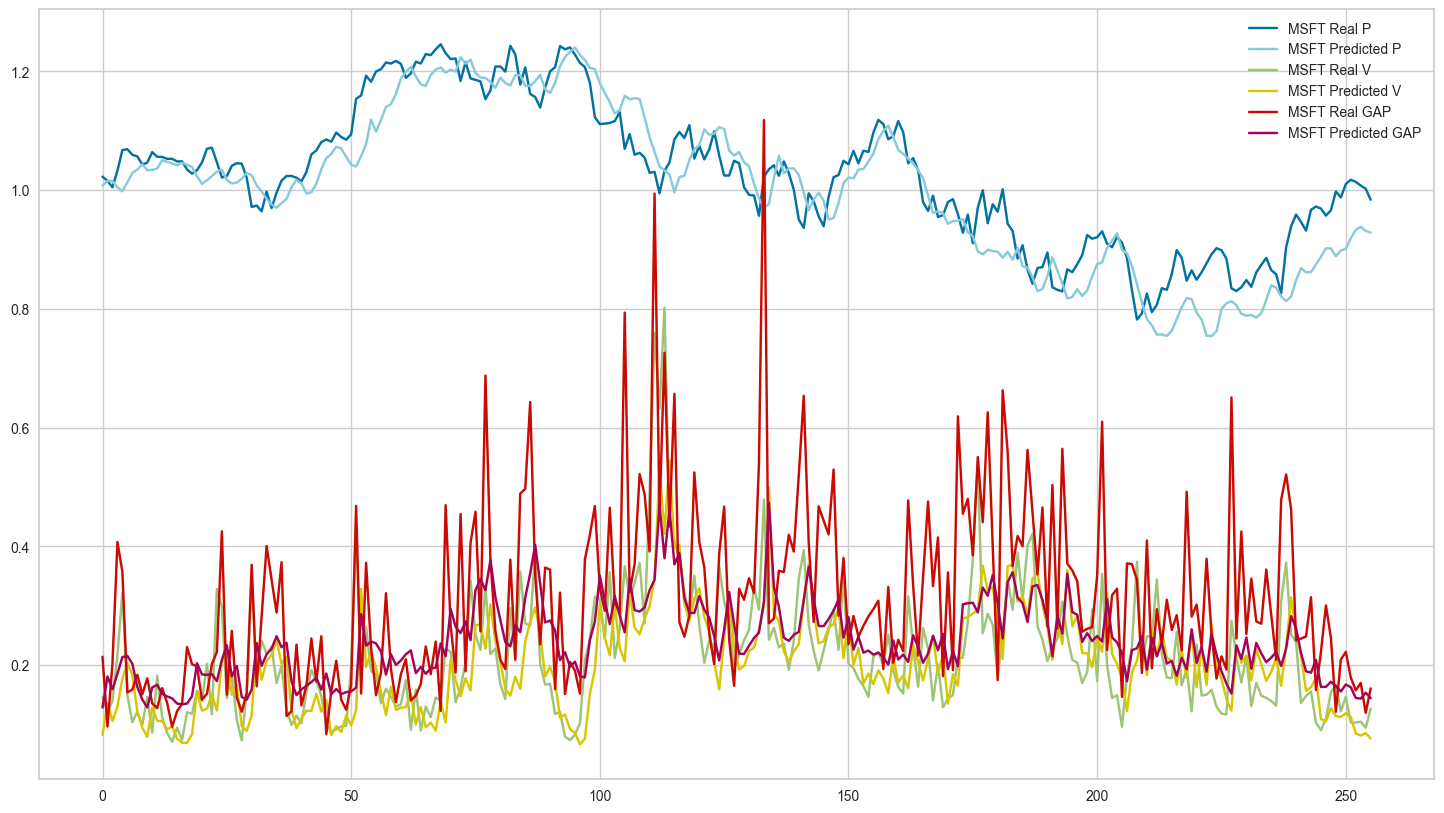

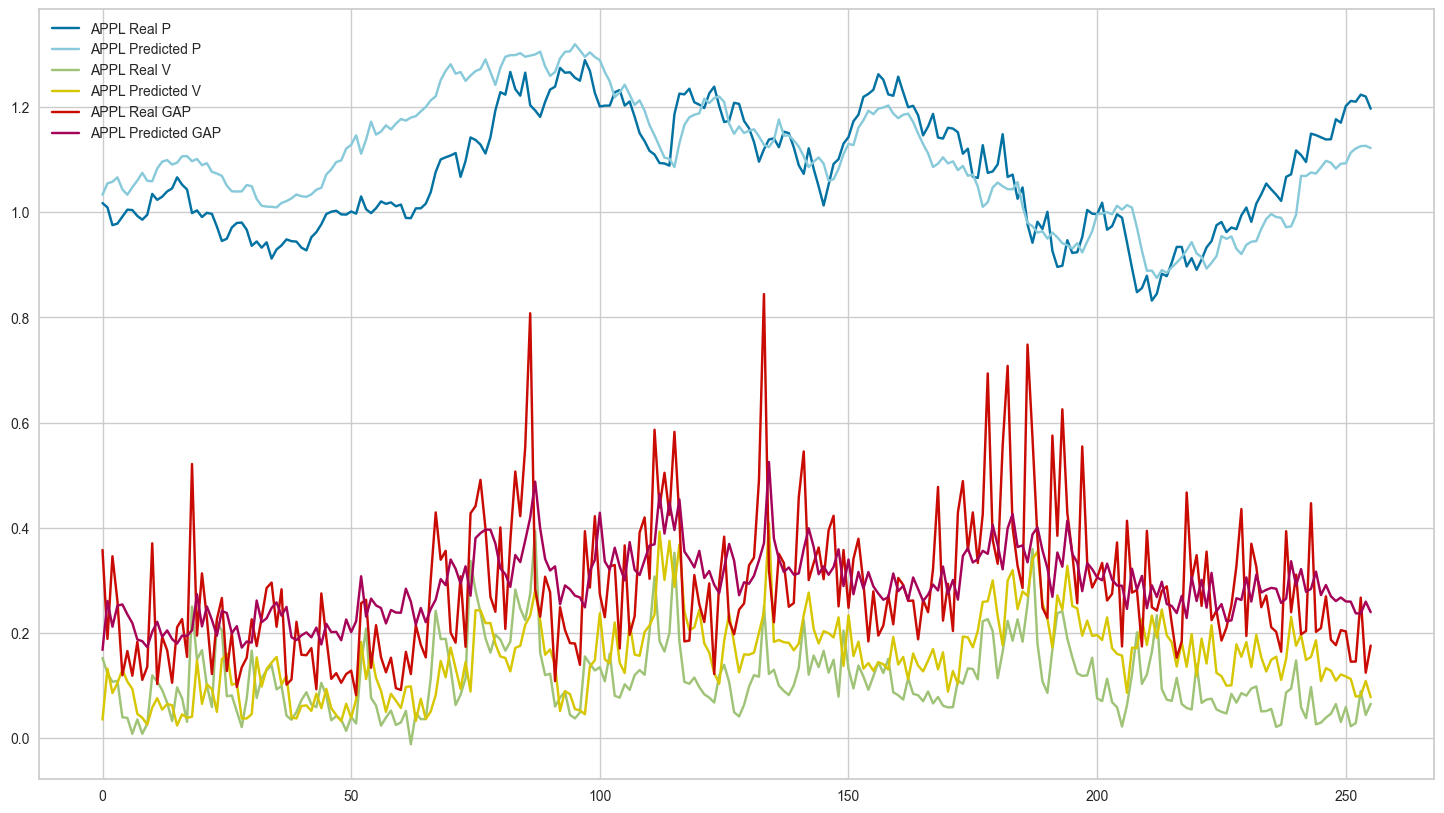

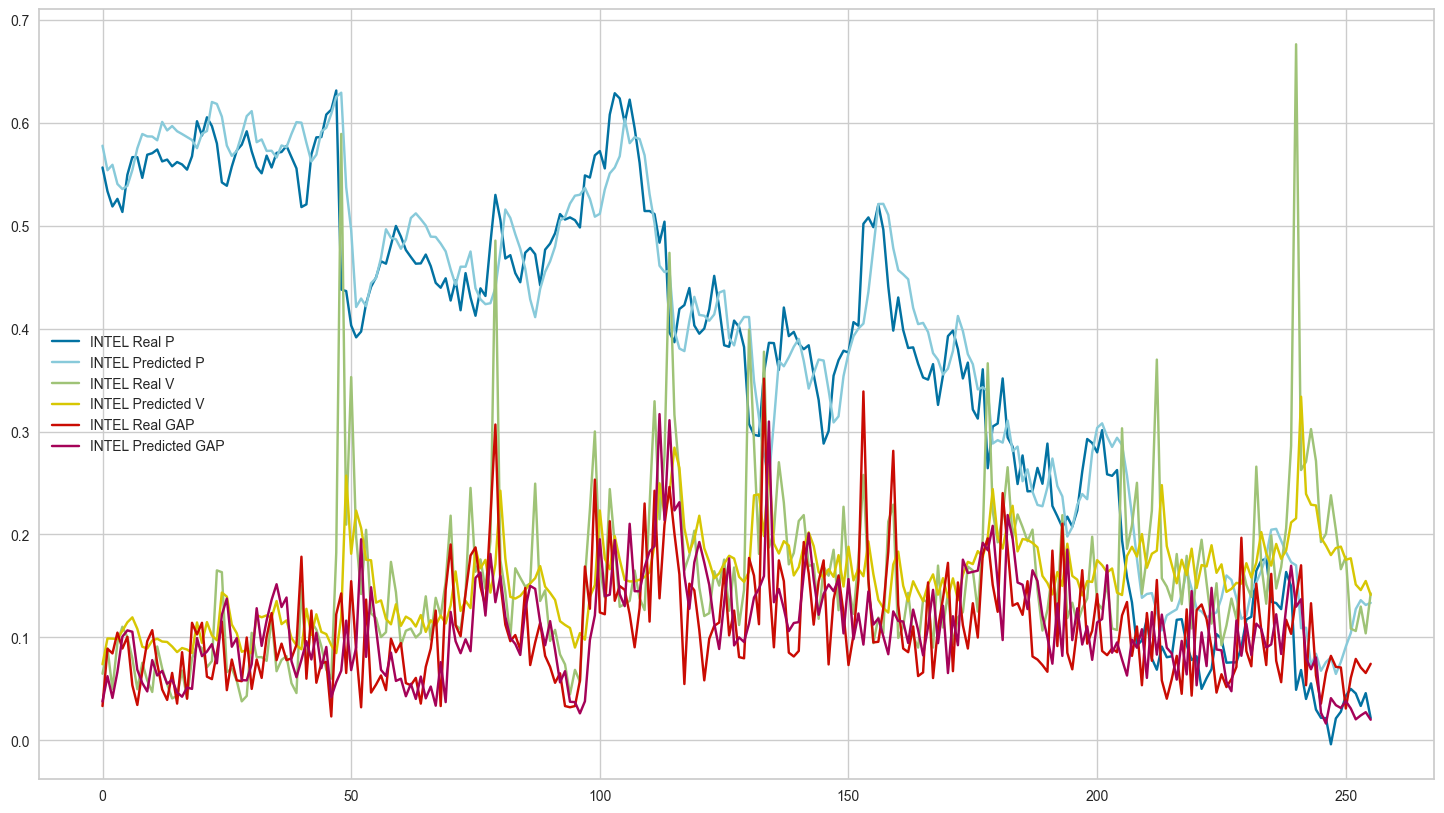

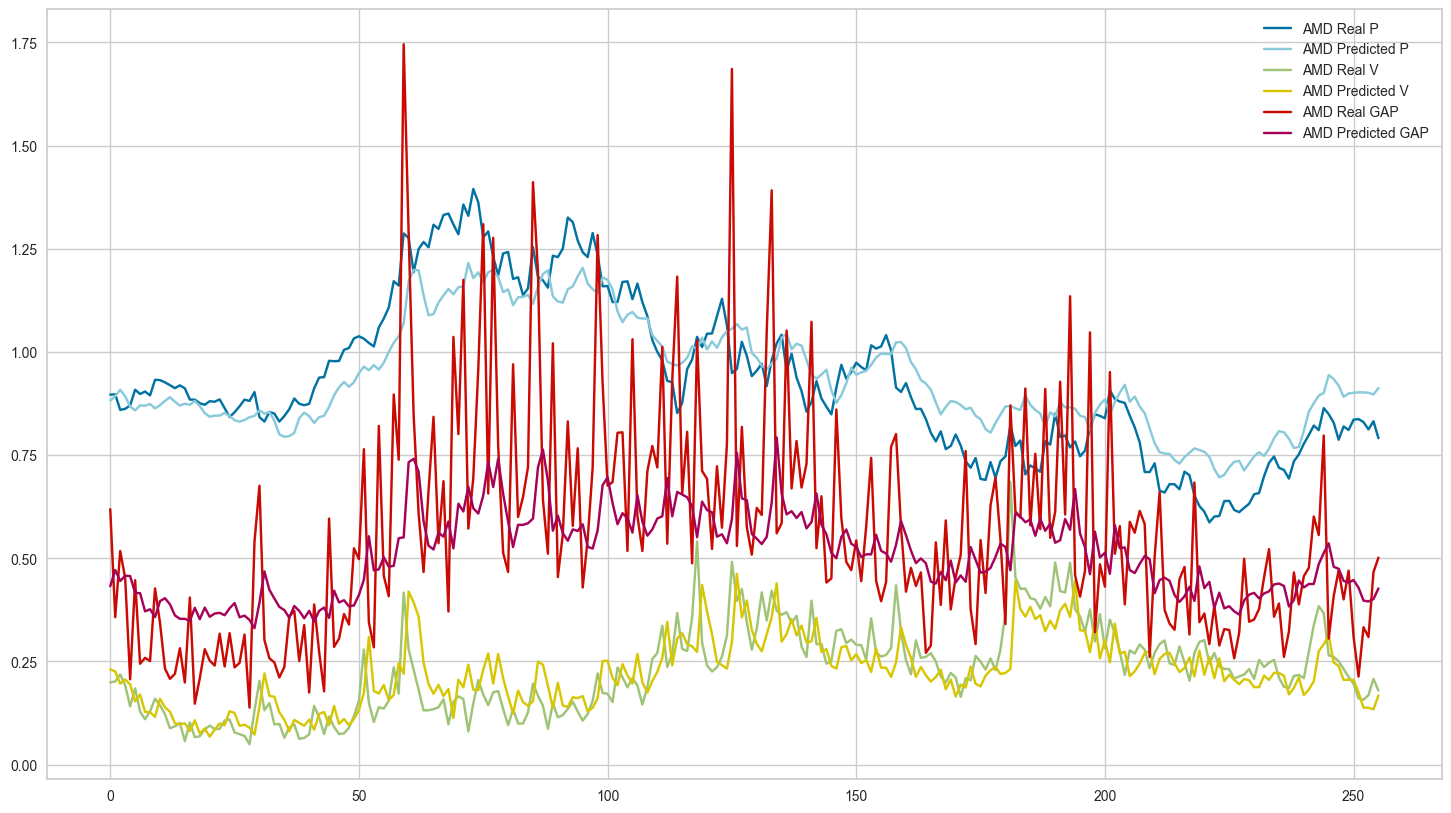

In [ ]:

companies = ["GOOGLE","MSFT","APPL","INTEL","AMD"];
for i in range(0,5):
    plt.figure(figsize=(18,10));
    plt.plot(y_test[:,3*i+0],'b',label = f'{companies[i]} Real P');
    plt.plot(pred[:,3*i+0],'c',label = f'{companies[i]} Predicted P');
    plt.plot(y_test[:,3*i+1],'g',label = f'{companies[i]} Real V');
    plt.plot(pred[:,3*i+1],'y',label = f'{companies[i]} Predicted V');
    plt.plot(y_test[:,3*i+2],'r',label = f'{companies[i]} Real GAP');
    plt.plot(pred[:,3*i+2],'m',label = f'{companies[i]} Predicted GAP');
    plt.legend();

Vemos que la forma de las predicciones se asemeja a la de los valores reales, aunque al modelo parece costarle predecir los picos.

Parece que podríamos obtener una predicción aproximada, pero nada muy concreto

<strong>
Vamos a intentar resolver un problema más sencillo que predecir la cotización de las acciones con las ventanas pasadas. A partir de la variable del precio de las acciones de Google genera una variable que indique si el valor subió o bajó respecto al día anterior.
 
Esa es la variable que intentaremos predecir, resolveremos un problema de clasificación.

In [ ]:
nasdaqScaler = MinMaxScaler();
nasdaq_training = nasdaqScaler.fit_transform(nasdaq[:1000].to_numpy());
nasdaq_testing = nasdaqScaler.transform(nasdaq[1000:].to_numpy());

In [ ]:
len(nasdaq_training[1])
indice = len(nasdaq_training[1])*2 # donde se encuentra el precio del tercer dia

In [ ]:
norm_train = (nasdaq_training);
norm_test = (nasdaq_testing);

X_train = sliding_window_view(norm_train, [w,nasdaq_training.shape[1]]).copy().squeeze()
X_train =  np.array([x.flatten() for x in X_train])
X_test = sliding_window_view(norm_test, [w,nasdaq_testing.shape[1]]).copy().squeeze()
X_test =  np.array([x.flatten() for x in X_test])


In [ ]:
y_train = np.zeros(shape=(len(X_train)),dtype=int)
for i in range(0,len(X_train)-1):
    if(X_train[i][indice]<X_train[i+1][indice]): y_train[i] = 1
    else :  y_train[i] = 0

if(X_train[len(X_train)-1][indice]<X_test[0][indice]): y_train[-1] = 1
else : y_train[-1] = 0
    
y_test = np.zeros(shape=(len(X_test)),dtype=int)
for i in range(0,len(X_test)-1):
    if(X_test[i][indice]<X_test[i+1][indice]): y_test[i] = 1
    else :  y_test[i] = 0

y_test[-1] = 0


In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.000,0.102,0.047,0.000,0.099,0.021,0.033,0.157,0.038,7.983e-03,...,0.013,0.039,0.084,0.015,2.957e-04,0.077,0.026,0.027,0.106,0.051
1,0.010,0.140,0.094,0.005,0.067,0.026,0.039,0.107,0.022,0.000e+00,...,0.022,0.038,0.088,0.027,1.774e-03,0.045,0.015,0.027,0.084,0.022
2,0.011,0.127,0.057,0.003,0.061,0.013,0.039,0.084,0.015,2.957e-04,...,0.025,0.039,0.145,0.009,5.914e-04,0.048,0.017,0.027,0.060,0.022
3,0.008,0.157,0.103,0.002,0.093,0.022,0.038,0.088,0.027,1.774e-03,...,0.010,0.042,0.150,0.024,0.000e+00,0.082,0.000,0.025,0.078,0.030
4,0.005,0.121,0.052,0.003,0.052,0.025,0.039,0.145,0.009,5.914e-04,...,0.037,0.046,0.190,0.045,2.365e-03,0.054,0.010,0.024,0.072,0.014


In [ ]:

# vemos que los valores de train estan relativamoente balanceados, favorecen un poco a sube
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 447, 1: 551}

<strong>
b) Usaremos como modelo base la regresión logística. Ajusta este modelo explorando sus
hiperparámetros adecuadamente. Utiliza la exploración bayesiana como hemos hecho en
otros ejemplos para poder explorar mejor el espacio de hiperparámetros. Obtén el acierto
de validación cruzada, el acierto en el test, la matriz de confusión, la curva ROC y el
informe de clasificación

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
lr = LogisticRegression();
print('non fitted cross_val of lreg: ' + str(np.mean(cross_val_score(lr,X_train,y_train,cv=10))));


non fitted cross_val of lreg: 0.519070707070707


In [ ]:
param = {'penalty':['l1', 'l2'], 'C':10**np.linspace(-3,3,1001, endpoint=True)}

#usamos liblinear porque funciona mejor con datasets pequeños que los demas, segun la documentación
lreg = LogisticRegression(max_iter=1000,solver='liblinear')
lr_bs =  BayesSearchCV(lreg,param,n_iter=niter,cv=cv, n_jobs=-1, refit=True, random_state=0)
lr_bs.fit(X_train,y_train);
show_html(pd.DataFrame(lr_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
3,"{'C': 0.007620790100254122, 'penalty': 'l2'}",0.552,1
4,"{'C': 0.025003453616964322, 'penalty': 'l1'}",0.552,1
8,"{'C': 0.0035645113342624426, 'penalty': 'l2'}",0.552,1
9,"{'C': 0.16595869074375613, 'penalty': 'l1'}",0.552,1
14,"{'C': 0.03580964371026361, 'penalty': 'l1'}",0.552,1


In [ ]:
lr_ajustado = LogisticRegression(C =0.007620790100254122,penalty='l2',max_iter=1000,solver='liblinear',random_state=0)

In [ ]:
print('fitted cross_val of lreg: ' + str(np.mean(cross_val_score(lr_ajustado,X_train,y_train,cv=10))))

fitted cross_val of lreg: 0.5521111111111111


Obtenemos una score de validación cruzada ligeramente mejor al ajustar los hiperparámetros, sigue siendo un % de acierto demasiado bajo. Teniendo en cuenta que solo hay dos clases posibles, casi sería equivalente a clasificarlos al azar

In [ ]:
#vemos que los valores del test estan balanceados
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 125, 1: 132}

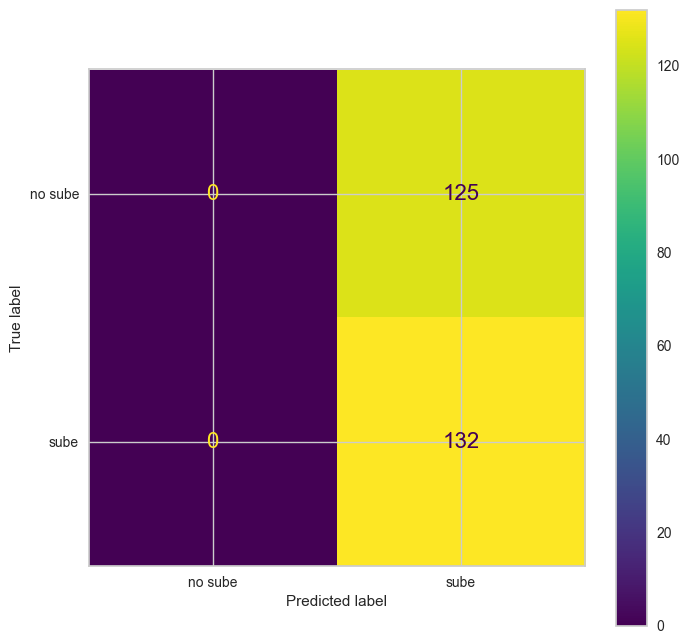

In [ ]:
lr_ajustado.fit(X_train,y_train);
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lr_ajustado, X_test,y_test, ax=plt.subplot(),display_labels=["no sube","sube"]);

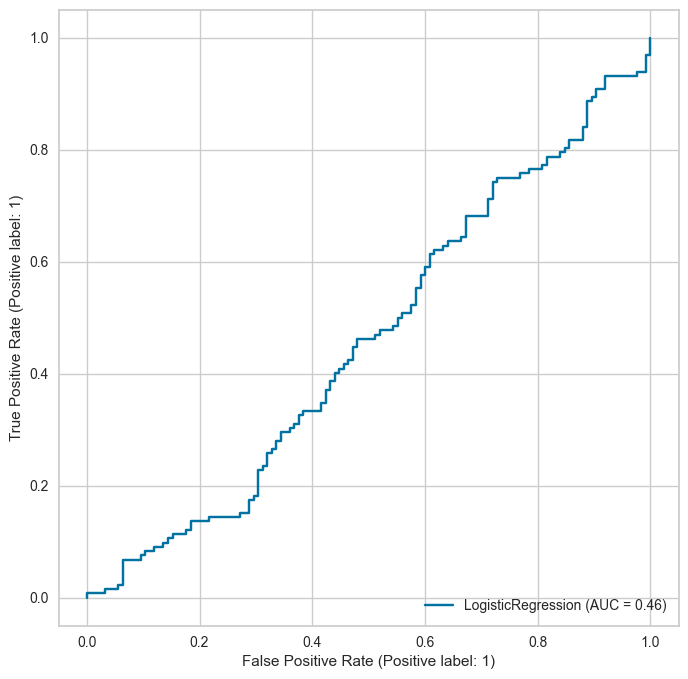

In [ ]:
plt.figure(figsize=(8,8));
RocCurveDisplay.from_estimator(lr_ajustado, X_test,y_test, pos_label=1, ax=plt.subplot());

Curva de ROC lejos de ser ideal, sigue de cerca a la recta entre (0,0) y (1,1), lo que nos indica que las predicciones no son para nada fiables

In [ ]:
print(classification_report(lr_ajustado.predict(X_test), y_test,));


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.51      0.68       257

    accuracy                           0.51       257
   macro avg       0.50      0.26      0.34       257
weighted avg       1.00      0.51      0.68       257



Vemos que la precisión en los datos de test baja hasta el 51%. De hecho, el modelo opta por predecir que todas suben y como los datos están balanceados acierta la mitad, estos se puede observar también en la matriz de confusión y en la curva de ROC. Este modelo no nos sirve para nada


<strong>
c) Ajusta ahora un MLP explorando sus hiperparámetros adecuadamente. Usa también la
exploración bayesiana. Obtén el acierto de validación cruzada, el acierto en el test, la matriz
de confusión, la curva ROC y el informe de clasificación. Comenta las diferencias entre
este modelo y la regresión logística. Te parecen adecuados los modelos que se han obtenido
¿Por qué?


In [ ]:
mlp = MLPClassifier();
print('non fitted cross_val of mlp: ' + str(np.mean(cross_val_score(mlp,X_train,y_train,cv=10))));

non fitted cross_val of mlp: 0.4579191919191919


In [ ]:
param = {'hidden_layer_sizes':[10, 50, 100, 200, 300,500], 
'activation':['relu', 'identity', 'logistic'], 
'alpha':[0.0001, 0.001, 0.01,0.1],
'momentum': [0.95, 0.90, 0.85, 0.8,0.7], 
'learning_rate_init': [0.001, 0.01, 0.1],
'n_iter_no_change':[10, 20, 40, 50], 
'learning_rate': ['constant', 'invscaling', 'adaptive']}

mlp =  MLPClassifier(max_iter=10000,early_stopping=True,random_state=0)
mlp_bs =  BayesSearchCV(mlp,param,
                        n_iter=niter, 
                        cv=cv, n_jobs=-1, 
                        refit=True,random_state=0)
mlp_bs.fit(X_train, y_train);


In [ ]:
show_html(pd.DataFrame(mlp_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
10,"{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 10, 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'momentum': 0.85, 'n_iter_no_change': 40}",0.553,1
7,"{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': 300, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'momentum': 0.8, 'n_iter_no_change': 10}",0.552,2
0,"{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': 200, 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'momentum': 0.95, 'n_iter_no_change': 10}",0.551,3
4,"{'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': 300, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'momentum': 0.8, 'n_iter_no_change': 10}",0.551,4
9,"{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 50, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'momentum': 0.9, 'n_iter_no_change': 40}",0.549,5


In [ ]:
mlp_ajustado = MLPClassifier(activation= 'relu', alpha= 0.0001, hidden_layer_sizes= 10, learning_rate= 'invscaling', learning_rate_init= 0.1, momentum= 0.85, n_iter_no_change= 40,random_state=0)
print('fitted cross_val of mlpc: ' + str(np.mean(cross_val_score(mlp_ajustado,X_train,y_train,cv=10))))


fitted cross_val of mlpc: 0.6221212121212122


              precision    recall  f1-score   support

           0       0.06      0.64      0.10        11
           1       0.97      0.52      0.68       246

    accuracy                           0.53       257
   macro avg       0.51      0.58      0.39       257
weighted avg       0.93      0.53      0.65       257



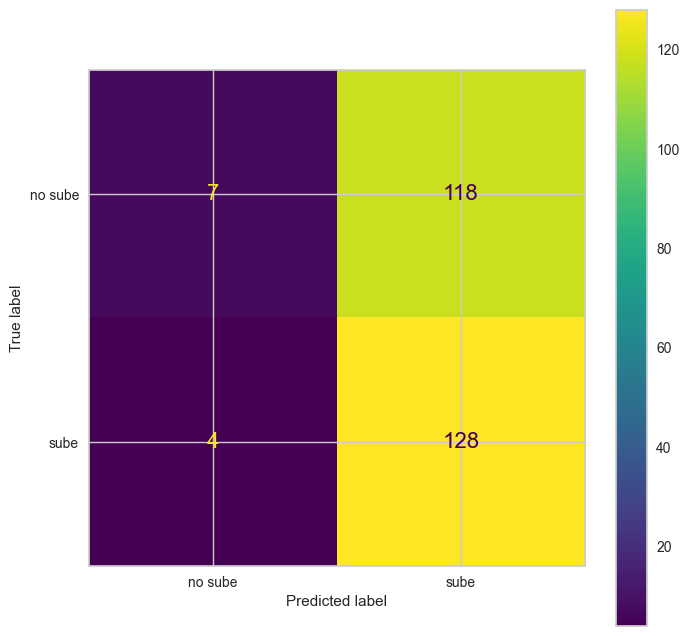

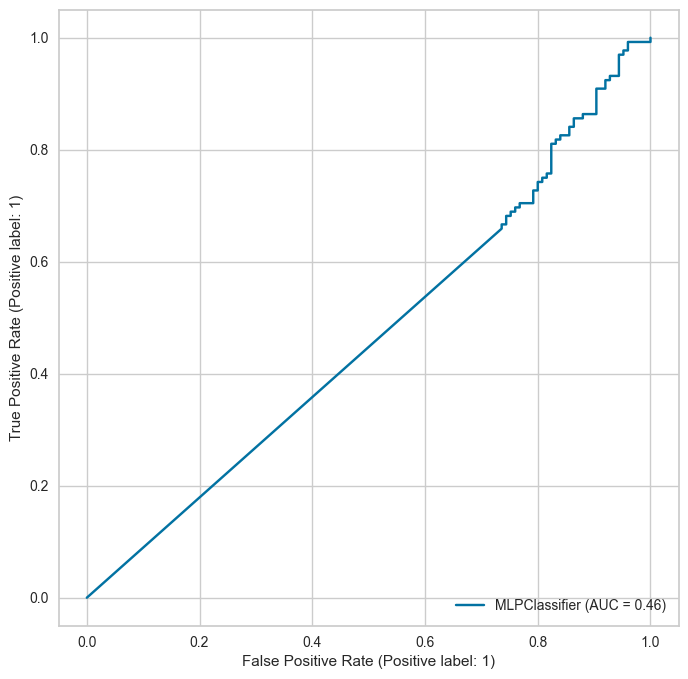

In [ ]:
mlp_ajustado.fit(X_train,y_train);
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(mlp_ajustado, X_test,y_test, ax=plt.subplot(),display_labels=["no sube","sube"]);

plt.figure(figsize=(8,8));
RocCurveDisplay.from_estimator(mlp_ajustado, X_test,y_test, pos_label=1, ax=plt.subplot());

print(classification_report(mlp_ajustado.predict(X_test), y_test,));

Curva de ROC practicamete plana, es decir que las predicciones no valen para nada

Obtenemos resultados parecidos a los de la regresión logística, igual de malos, aunque al menos el mlp se aventura a hacer alguna predicción a la baja.

Ambos modelos son pésimos, seguramente debido a que hay muchísimos más datos que afectan al precio del stock de los que tenemos, tanto dentro del nasdaq como factores externos a la borsa


<strong>
d) Quizás el resultado sea diferente si predecimos otra cosa más fácil. Calcula como etiquetas
si el volumen de negociación de las acciones de Google sube o no respecto al día anterior
y ajusta los mismos modelos que en los apartados anteriores. Compara los resultados de
los modelos para este nuevo problema. ¿Hay alguna diferencia con la otra variable? ¿Se te
ocurre alguna explicación?


In [ ]:
##mismo preproceso que antes
nasdaqScaler = MinMaxScaler();
nasdaq_training = nasdaqScaler.fit_transform(nasdaq[:1000].to_numpy());
nasdaq_testing = nasdaqScaler.transform(nasdaq[1000:].to_numpy());
norm_train = (nasdaq_training);
norm_test = (nasdaq_testing);

X_train = sliding_window_view(norm_train, [w,nasdaq_training.shape[1]]).copy().squeeze()
X_train =  np.array([x.flatten() for x in X_train])
X_test = sliding_window_view(norm_test, [w,nasdaq_testing.shape[1]]).copy().squeeze()
X_test =  np.array([x.flatten() for x in X_test])

indice = len(nasdaq_training[1])*2 + 1 ##donde se encuentra el volumen del tercer dia

## teniendo los tres dias previos, queremos predecir si subira o no el volumen de las acciones el 4rto dia
y_train = np.zeros(shape=(len(X_train)),dtype=int)
for i in range(0,len(X_train)-1):
    if(X_train[i][indice]<X_train[i+1][indice]): y_train[i] = 1
    else :  y_train[i] = 0

if(X_train[len(X_train)-1][indice]<X_test[0][indice]): y_train[-1] = 1
else : y_train[-1] = 0
    
y_test = np.zeros(shape=(len(X_test)),dtype=int)
for i in range(0,len(X_test)-1):
    if(X_test[i][indice]<X_test[i+1][indice]): y_test[i] = 1
    else :  y_test[i] = 0

y_test[-1] = 0

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
# vemos que los valores de train estan relativamoente balanceados, esta vez favorecen un poco no_sube
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 525, 1: 473}

In [ ]:
#los del test parecen balanceados
unique, counts = np.unique(y_test,return_counts=True)
dict(zip(unique, counts))

{0: 138, 1: 119}

#### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
lr = LogisticRegression();
print('non fitted cross_val of lreg: ' + str(np.mean(cross_val_score(lr,X_train,y_train,cv=10))));

non fitted cross_val of lreg: 0.6301919191919192


In [ ]:
param = {'penalty':['l1', 'l2'], 'C':10**np.linspace(-3,3,1001, endpoint=True)}

#usamos liblinear porque funciona mejor con datasets pequeños que los demas, segun la documentación
lreg = LogisticRegression(max_iter=1000,solver='liblinear')
lr_bs =  BayesSearchCV(lreg,param,n_iter=niter,cv=cv, n_jobs=-1, refit=True, random_state=0)
lr_bs.fit(X_train,y_train);
show_html(pd.DataFrame(lr_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
2,"{'C': 1.492794409578996, 'penalty': 'l1'}",0.655,1
9,"{'C': 0.16595869074375613, 'penalty': 'l1'}",0.648,2
5,"{'C': 106.6596121230259, 'penalty': 'l2'}",0.644,3
0,"{'C': 1.5346169827992941, 'penalty': 'l2'}",0.641,4
11,"{'C': 1.492794409578996, 'penalty': 'l2'}",0.639,5


In [ ]:
lr_ajustado = LogisticRegression(C= 1.492794409578996, penalty= 'l1',max_iter=1000,solver='liblinear',random_state=0)

In [ ]:
print('fitted cross_val of lreg: ' + str(np.mean(cross_val_score(lr_ajustado,X_train,y_train,cv=10))))

fitted cross_val of lreg: 0.6512626262626263


Observamos que en la validación cruzada ya obtenemos un resultado un poco más decente que con la otra variable, aunque sigue siendo malo

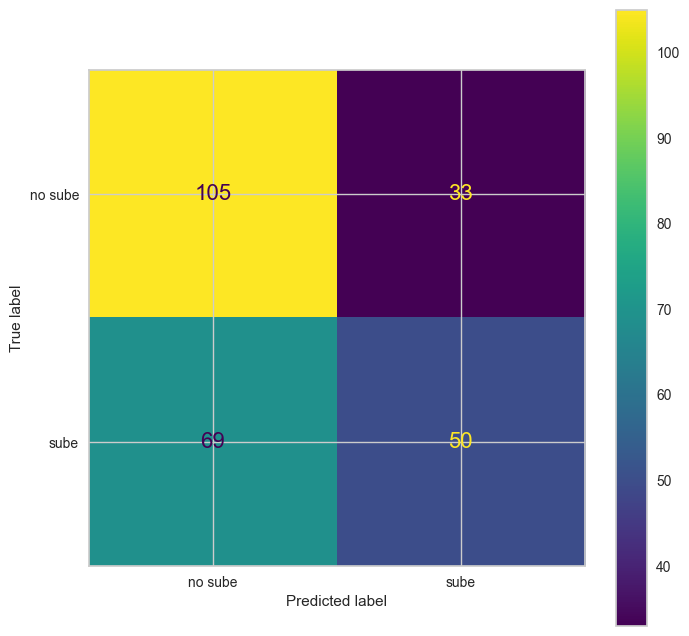

In [ ]:
lr_ajustado.fit(X_train,y_train);
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lr_ajustado, X_test,y_test, ax=plt.subplot(),display_labels=["no sube","sube"]);

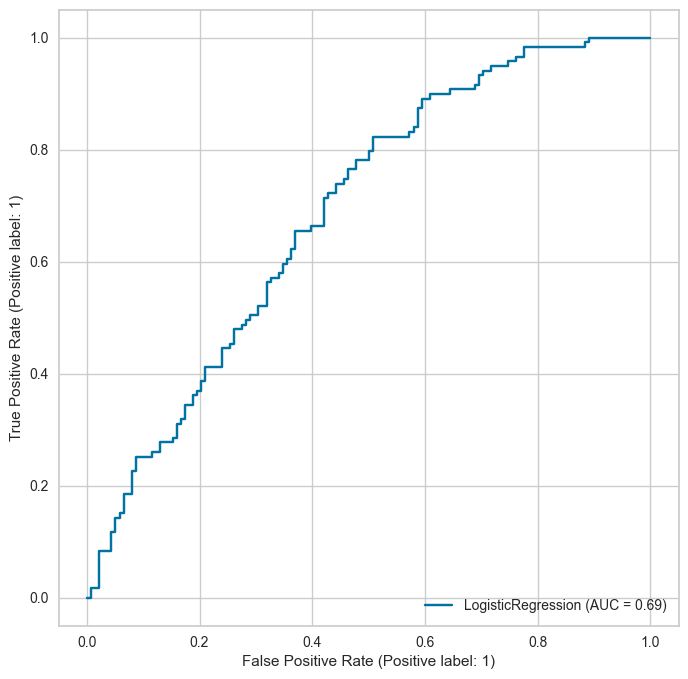

In [ ]:
plt.figure(figsize=(8,8));
RocCurveDisplay.from_estimator(lr_ajustado, X_test,y_test, pos_label=1, ax=plt.subplot());

Curva de ROC bastante mejor a las anteriores, con bastante más área debajo de la curva

In [ ]:
print(classification_report(lr_ajustado.predict(X_test), y_test,target_names=["no sube","sube"]));


              precision    recall  f1-score   support

     no sube       0.76      0.60      0.67       174
        sube       0.42      0.60      0.50        83

    accuracy                           0.60       257
   macro avg       0.59      0.60      0.58       257
weighted avg       0.65      0.60      0.62       257



En este caso tenemos menor acierto que en el conjunto de entrenamiento, lo que nos hace pensar que nuestro modelo sufre de overfitting. Vemos también que como con la variable anterior, el LogisticRegressor tiene un bias hacia la clase mayoritaria en el conjunto de entrenamiento, si el conjunto de datos estuviera mejor balanceado a lo mejor obtendríamos mejores resultados.

Este modelo tampoco nos sirve de mucho, aunque los resultados son ligeramente mejores a
los obtenidos prediciendo el precio, siguen estando bastante por debajo de lo ideal.

#### MLP

In [ ]:
mlp = MLPClassifier();
print('non fitted cross_val of mlp: ' + str(np.mean(cross_val_score(mlp,X_train,y_train,cv=10))));

non fitted cross_val of mlp: 0.6141414141414142


In [ ]:
param = {'hidden_layer_sizes':[10, 50, 100, 200, 300,500], 
'activation':['relu', 'identity', 'logistic'], 
'alpha':[0.0001, 0.001, 0.01,0.1],
'momentum': [0.95, 0.90, 0.85, 0.8,0.7], 
'learning_rate_init': [0.001, 0.01, 0.1],
'n_iter_no_change':[10, 20, 40, 50], 
'learning_rate': ['constant', 'invscaling', 'adaptive']}

mlp =  MLPClassifier(max_iter=10000,early_stopping=True,random_state=0)
mlp_bs =  BayesSearchCV(mlp,param,
                        n_iter=niter, 
                        cv=cv, n_jobs=-1, 
                        refit=True,random_state=0)
mlp_bs.fit(X_train, y_train);


In [ ]:
show_html(pd.DataFrame(mlp_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
13,"{'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'momentum': 0.95, 'n_iter_no_change': 40}",0.652,1
12,"{'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'momentum': 0.9, 'n_iter_no_change': 50}",0.649,2
3,"{'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'momentum': 0.9, 'n_iter_no_change': 50}",0.642,3
11,"{'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': 500, 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'momentum': 0.8, 'n_iter_no_change': 50}",0.621,4
14,"{'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': 50, 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'momentum': 0.95, 'n_iter_no_change': 40}",0.621,5


In [ ]:
mlp_ajustado = MLPClassifier( activation= 'identity', alpha= 0.1, hidden_layer_sizes= 100, learning_rate= 'invscaling', learning_rate_init= 0.01, momentum= 0.95, n_iter_no_change= 40,random_state=0)
print('fitted cross_val of mlpc: ' + str(np.mean(cross_val_score(mlp_ajustado,X_train,y_train,cv=10))))


fitted cross_val of mlpc: 0.6341313131313131


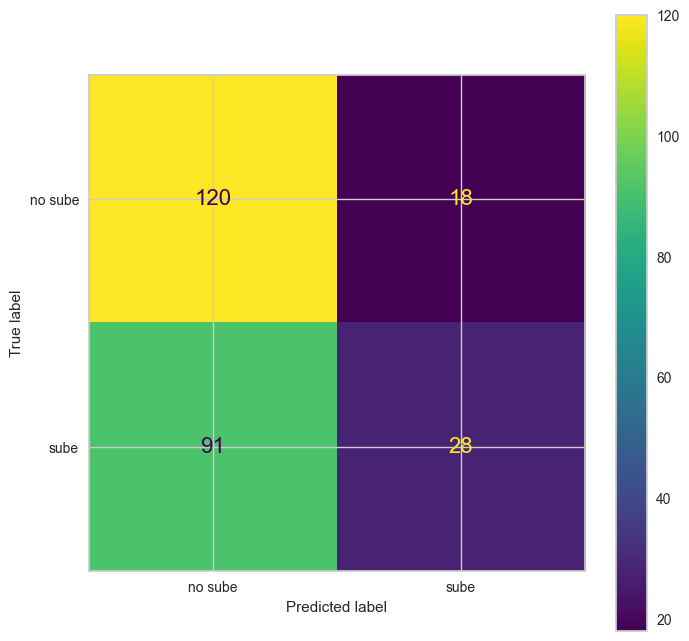

In [ ]:
mlp_ajustado.fit(X_train,y_train);
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(mlp_ajustado, X_test,y_test, ax=plt.subplot(),display_labels=["no sube","sube"]);


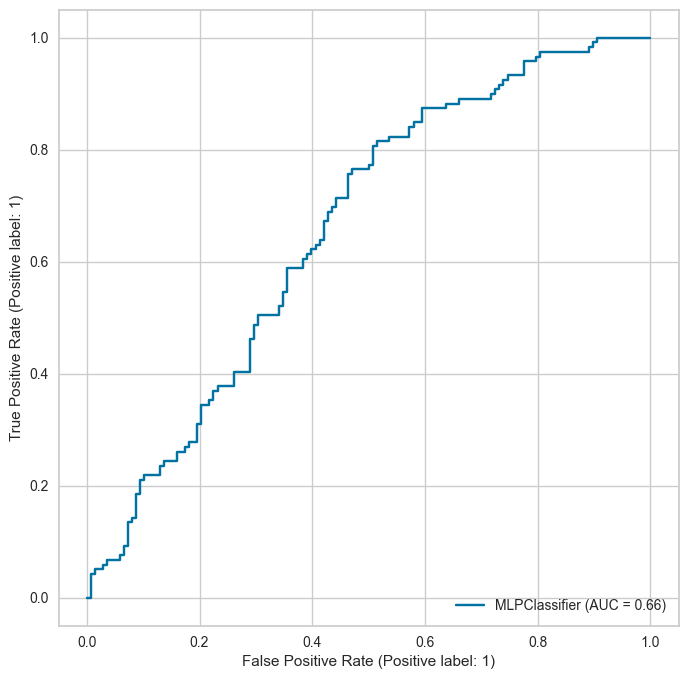

In [ ]:
plt.figure(figsize=(8,8));
RocCurveDisplay.from_estimator(mlp_ajustado, X_test,y_test, pos_label=1, ax=plt.subplot());


Curva de ROC algo peor a la de LogisticRegression, aunque bastante mejor a la obtenida con la otra variable

In [ ]:
print(classification_report(mlp_ajustado.predict(X_test), y_test,));

              precision    recall  f1-score   support

           0       0.87      0.57      0.69       211
           1       0.24      0.61      0.34        46

    accuracy                           0.58       257
   macro avg       0.55      0.59      0.51       257
weighted avg       0.76      0.58      0.63       257



Podemos ver unos resultados similares a la LogisticRegression, aunque en este caso la validación cruzada nos da un poco peor, el % de acierto en el test es el mismo.

#### Conclusión

Aunque a primera vista parezca que la tasa de acierto de las dos variables sea similar, esto se debe a que solo hay dos categorías y están balanceadas, así que eligiendo al azar (o haciendo la misma predicción) tienes un ~50% de acertar. Este es el caso de las predicciones de la subida de precio.

En cambio, en la subida del volumen de acciones, podemos ver en la matriz de confusión que se hace una predicción real, y obtiene un menor número de falsos positivos. Haciendo las predicciones obtiene un +10% de acierto.

Seguramente el volumen de acciones sea más dependiente de los datos que tenemos y no tanto de factores externos, lo que nos permite ajustar mejor el modelo. En cambio, el precio de la acción seguramente depende de otros muchos factores con más peso que los datos que tenemos, por lo que al modelo le falta información para llegar a una predicción.